In [2]:
### DEFINE IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Basic libararies
import os
import yaml
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from zipfile import ZipFile, ZIP_DEFLATED

## PyTorch libraries
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

## PyTorch Lightning libraries
import lightning as L
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor

## Weight and Biases 
import wandb

## View-of-Delft devkit
from vod.configuration import KittiLocations
from vod.frame import FrameDataLoader, FrameTransformMatrix, homogeneous_transformation

## Our self-defined libraries
# from src.model.voxel_encoders import PillarFeatureNet
# from src.model.middle_encoders import PointPillarsScatter
# from src.model.backbones import SECOND
# from src.model.necks import SECONDFPN
# from src.model.heads import CenterHead
# from src.model.utils import LiDARInstance3DBoxes ### predefined class for 3D bounding box annotations
# from src.ops import Voxelization
# from src.dataset import collate_vod_batch

## Load Point Cloud

In [4]:
data_root = '/home/mramidi/final_assignment/data/view_of_delft' 

def load_vod_point_cloud(data_root, frame_id):
    """
    Load point cloud data from the specified frame ID.
    """
    assert frame_id < 5139 # Total number of samples in the train split
    train_split_file = os.path.join(data_root, 'lidar', 'ImageSets', 'test.txt')
    with open(train_split_file, 'r') as f:
        lines = f.readlines()
        sample_list = [line.strip() for line in lines]
    
    lidar_data = np.nan
    # YOUR CODE HERE
    kitti_locations = KittiLocations(root_dir=data_root)
    frame_data = FrameDataLoader(kitti_locations=kitti_locations, frame_number=sample_list[frame_id])
    lidar_data = frame_data.lidar_data
    raw = frame_data.raw_labels
    print(raw)

    return lidar_data


ERROR:root:03190.txt does not exist at location: /home/mramidi/final_assignment/data/view_of_delft/lidar/training/label_2!


None


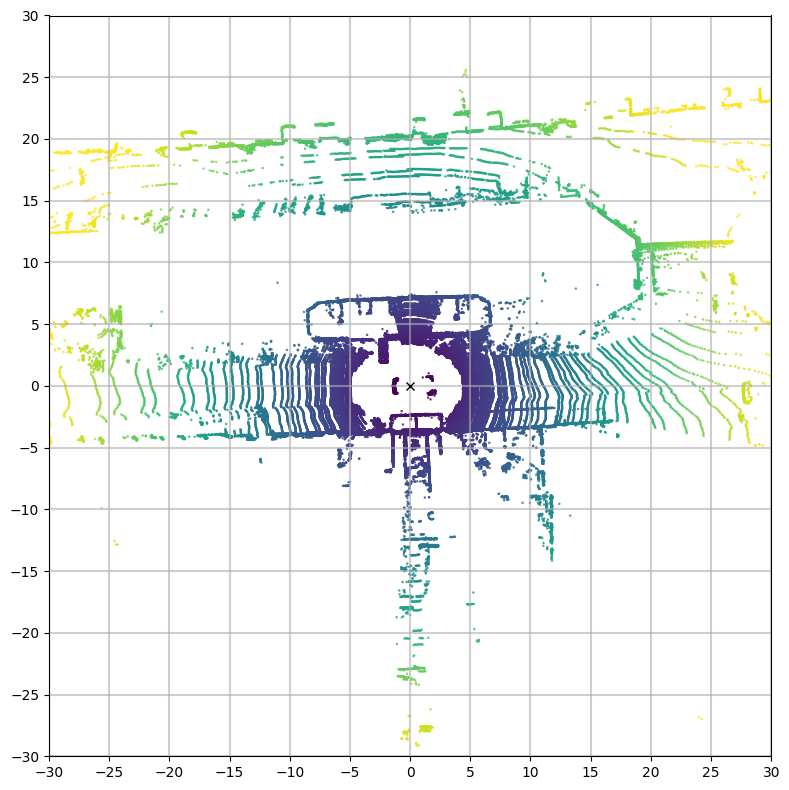

In [5]:
idx = 658
pc = load_vod_point_cloud(data_root, idx)
point_cloud_range = 30

# Visualize the point cloud from a Bird's Eye View 

fig, ax = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True, frameon=True)
ax.set_facecolor('white')

dists = np.sqrt(pc[:,0]**2 + pc[:,1]**2)
colors = np.minimum(1, dists / point_cloud_range)
ax.scatter(pc[:,0], pc[:,1], c=colors, s=0.5, alpha=0.5)

major_ticks = np.arange(-point_cloud_range, point_cloud_range+0.1, 5)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.set_xlim(-point_cloud_range, point_cloud_range)
ax.set_ylim(-point_cloud_range, point_cloud_range)
ax.grid(which = 'major', alpha = 0.6, linewidth=1.5)

ax.plot(0, 0, 'x', color='black') ## origin
plt.show()

In [21]:
train_split_file = os.path.join(data_root, 'lidar', 'ImageSets', 'train.txt')
with open(train_split_file, 'r') as f:
    lines = f.readlines()
    sample_list = [line.strip() for line in lines]
    
num_frame = sample_list[sample_idx]
img_path = os.path.join(data_root, 'lidar', 'training', 'image_2', f'{num_frame}.jpg')

img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

NameError: name 'sample_idx' is not defined